In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.termination import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.optimize import minimize
 
#definition of the problem
class MyProblem(ElementwiseProblem):
     
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))
 
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2
 
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
 
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
 
problem = MyProblem()
 
#parameters
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)
 
#termination criteria
termination = get_termination("n_gen", 40)
 
#solve problem
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)
 
#get solutions
X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  2.363992E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  1.262978E+01 |  0.000000E+00 |             f
     3 |       60 |      2 |  0.000000E+00 |  5.3749132447 |  1.0000000000 |         ideal
     4 |       70 |      2 |  0.000000E+00 |  2.4309071542 |  0.000000E+00 |             f
     5 |       80 |      3 |  0.000000E+00 |  0.9326371456 |  0.0096178563 |         ideal
     6 |       90 |      3 |  0.000000E+00 |  0.1066499133 |  0.0601661450 |         ideal
     7 |      100 |      3 |  0.000000E+00 |  0.0092174421 |  0.000000E+00 |             f
     8 |      110 |      5 |  0.000000E+00 |  0.0010944863 |  0.2816759453 |         ideal
     9 |      120 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0124399889 |             f
    10 |      130 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0041045275 |         ideal

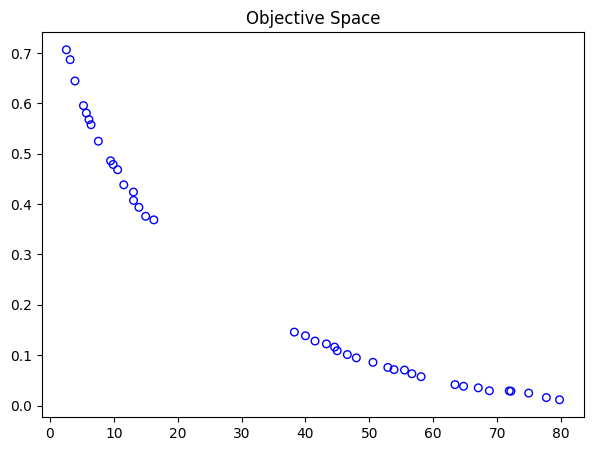

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()    